<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-murasakiw/blob/main/Semana6_Data_Analysis_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Ciencia y Analítica de Datos**
___
Semana 6: Data Analysis with Python (IBM)  
Nombre: Sergio Omar Esparza Hernández  
Matrícula: A01794338

#Módulo 3 - Exploratory Data Analysis

Exploratory Data Analysis
___

El análisis de datos exploratorio es un paso preliminar en el análisis de datos para:  


*   Resumir las características principales de los datos.
*   Obtener una mejor comprensión del conjunto de datos.
*   Descubrir relaciones entre variables.
*   Extraer las variables importantes.



Descriptive Statistics
___
*   Describen las características principales de los datos.
*   Proporcionan breves resumenes acerca de las muestras y medidas de los datos.




El método describe de pandas resume estadísticas de los datos numéricos.

In [52]:
#Se importan las librerías y la base de datos
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data'

df = pd.read_csv(url, header =  None)

In [53]:
#Se modifican los nombres de las columnas de las bases de datos
headers = ['symboling', 'normalized_losses', 'make', 'fuel_type', 'aspiration', 
           'num_of_doors', 'body_style', 'drive_wheels', 'engine_location',
           'wheel_base', 'length', 'width', 'height', 'curb_weight', 
           'engine_type', 'num_of_cylinders', 'engine_size', 'fuel_system', 
           'bore', 'stroke', 'compression_ratio', 'horsepower', 'peak_rpm',
           'city_mpg', 'highway_mpg', 'price']
df.columns = headers

In [54]:
df.describe() #Este método proporciona una breve descripción de los datos numéricos.
#Cualquier valor faltante es omitido en estos calculos.

,symboling,wheel_base,length,width,height,curb_weight,engine_size,compression_ratio,city_mpg,highway_mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


La configuración predeterminada del método describe() omite las variables de tipo objeto, se puede modificar el parámetro include para incluir las variables de este tipo.

In [55]:
df.describe(include=['object'])

,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,engine_type,num_of_cylinders,fuel_system,bore,stroke,horsepower,peak_rpm,price
count,205,205,205,205,205,205,205,205,205,205,205,205,205,205,205,205
unique,52,22,2,2,3,5,3,2,7,7,8,39,37,60,24,187
top,?,toyota,gas,std,four,sedan,fwd,front,ohc,four,mpfi,3.62,3.40,68,5500,?
freq,41,32,185,168,114,96,120,202,148,159,94,23,20,19,37,4


Una manera de resumir los datos categoricos es utilizando el método value_counts(). 

In [56]:
df['drive_wheels'].value_counts()

fwd    120
rwd     76
4wd      9
Name: drive_wheels, dtype: int64

In [57]:
df['drive_wheels'].value_counts().to_frame()

,drive_wheels
fwd,120
rwd,76
4wd,9


In [58]:
drive_wheels_counts = pd.DataFrame(df['drive_wheels'].value_counts())
drive_wheels_counts
drive_wheels_counts.rename(columns = {'drive_wheels':'value_counts'}, inplace=True)
drive_wheels_counts.index.name = 'drive_wheels'
drive_wheels_counts

,value_counts
drive_wheels,
fwd,120
rwd,76
4wd,9


Los diagramas de caja son una buena forma de visualizar datos numéricos. Se puede visulizar la distribución de los datos. Las principales características que muestra esta gráfica son: la mediana, el primer cuartil, el tercer cuartil, el rango intercuartil, los extremos superior e inferior (valores calculados utilizando 1.5 veces el rango intercuartil) y los outliers (valores que se salen de los extremos superior e inferior).

Los diagramas de caja son útiles para comparar diferentes grupos.

In [59]:
import seaborn as sns


In [60]:
df.dtypes

symboling              int64
normalized_losses     object
make                  object
fuel_type             object
aspiration            object
num_of_doors          object
body_style            object
drive_wheels          object
engine_location       object
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
engine_type           object
num_of_cylinders      object
engine_size            int64
fuel_system           object
bore                  object
stroke                object
compression_ratio    float64
horsepower            object
peak_rpm              object
city_mpg               int64
highway_mpg            int64
price                 object
dtype: object

In [61]:
df.replace('?', np.nan, inplace=True)
df['price'] = pd.to_numeric(df['price'])
media = np.mean(df.price)
df['price'] = df['price'].replace(np.nan, media)

In [62]:
df.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


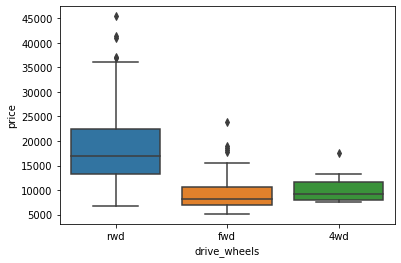

In [63]:
sns.boxplot(x = 'drive_wheels', y = 'price', data=df) #Boxplot para comparar los precios de las diferentes categorías en drive_wheels

Los gráficos de dispersión son útiles para comprender las relaciones entre variables. Este gráfico puede aportar información sobre si una variable puede predecir a otra. Los gráficos de dispersión muestran las relaciones entre dos variables.

El gráfico necesita de dos variables:


1.   La variable independiente en el eje x. La variable que predice a la otra.
2.   La variable objetivo en el eje y. La variable que se intenta predecir.



In [64]:
df.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


Text(0, 0.5, 'Price')

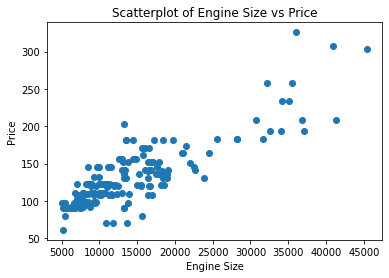

In [65]:
y = df['engine_size']
x = df['price']
plt.scatter(x, y)
plt.title('Scatterplot of Engine Size vs Price')
plt.xlabel('Engine Size')
plt.ylabel('Price')

GroupBy in Python
___

Agrupamiento de datos
El método de pandas groupby(), es un método utilizado en variables categóricas y agrupa los datos en subconjuntos de acuerdo a las diferentes categorías de esa variable.

In [66]:
df_test = df[['drive_wheels', 'body_style', 'price']]
df_grp = df_test.groupby(['drive_wheels', 'body_style'], as_index=False).mean()
df_grp

,drive_wheels,body_style,price
0,4wd,hatchback,10405.064677
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9930.934363
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


Una tabla pivot muestra una variable a lo largo de las columnas y la otra variable a lo largo de las filas.

In [67]:
df_pivot = df_grp.pivot(index='drive_wheels', columns='body_style')
df_pivot

price                                            \
body_style   convertible       hardtop     hatchback         sedan   
drive_wheels                                                         
4wd                  NaN           NaN  10405.064677  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9930.934363   
rwd              23949.6  24202.714286  14278.269966  21711.833333   

                            
body_style           wagon  
drive_wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

Otra forma de visualizar una tabla pivot es con un mapa de calor. Un mapa de calor toma unos datos organizados en forma rectangular y asigna una intensidad de color basada en el valor de los datos.
Es una excelente manera de graficar la variable objetivo a lo largo de múltiples variables y a través de esto obtener pistas visuales de la relación entre estas variables y la variable objetivo.

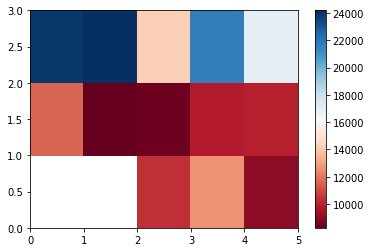

In [68]:
plt.pcolor(df_pivot, cmap='RdBu')
plt.colorbar()
plt.show()

Analysis of Variance ANOVA
___


Este tipo de análisis es útil para realizar comparaciones estadísticas de grupos. Por ejemplo, el precio promedio de diferentes marcas de vehículos.
Este método es útil para encontrar la correlación entre diferentes grupos de una varibale categórica.

Del análisis ANOVA se obtiene lo siguiente:


*   F-test score: Variación entre las medias del grupo de muestra divididas por la variación dentro del grupo de muestra. Un valor pequeño de F-test implica pobre correlación entre las categorías de la variable y la variable objetivo. Un valor grande de F-test implica una correlación fuerte entre las categorías de la variable y la variable objetivo.
*   p-value: Grado de confianza.



In [69]:
from scipy import stats

In [70]:
df_anova = df[['make', 'price']]
grouped_anova = df_anova.groupby(['make'])
#El test anova puede ser ejecutado en Python utilizando el método f_oneway 
anova_results = stats.f_oneway(grouped_anova.get_group('honda')['price'], grouped_anova.get_group('subaru')['price'])
anova_results #Los precios de honda y subaru no son significativamente diferentes, pues f-test es menor a 1 y p-value es mayor a 0.05

F_onewayResult(statistic=0.19744030127462606, pvalue=0.6609478240622193)

In [71]:
anova_results = stats.f_oneway(grouped_anova.get_group('honda')['price'], grouped_anova.get_group('jaguar')['price'])
anova_results #Los precios de honda y jaguar son significativamente diferentes, pues f-test es mucho mayor a 1 

F_onewayResult(statistic=400.925870564337, pvalue=1.0586193512077862e-11)

Existe una correlación fuerte entre una variable categórica y otras variables, si la prueba ANOVA arroja un valor grande de f-test y un valor pequeño de p-value.

Correlation
___

La correlación es una métrica utilizada para saber en qué medida dos variables son interdependientes.
Es importante mencionar que correlación no implica causalidad. No se puede asegurar que la ocurrencia de un evento ocasioné el otro, aunque ambos eventos estén altamente correlacionados.

Correlación entre dos variables.

(0.0, 52434.80879634829)

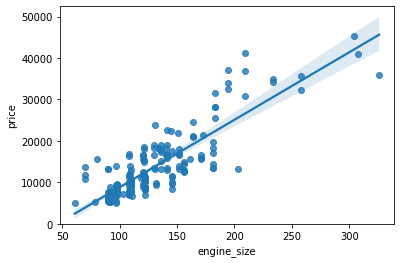

In [72]:
#Cuando se observa que el comportamiento es similar al de una recta con pendiente positiva, se tiene una correlación positiva
sns.regplot(x='engine_size', y='price', data=df)
plt.ylim(0)

(0.0, 48125.193728119615)

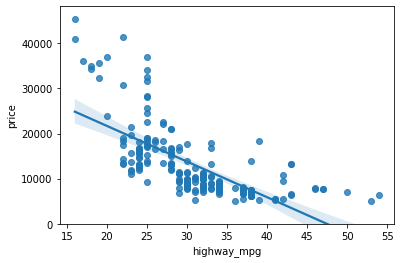

In [73]:
#Cuando se observa que el comportamiento es similar al de una recta con pendiente negativa, se tiene una correlación negativa
sns.regplot(x='highway_mpg', y='price', data=df)
plt.ylim(0)

(0.0, 47414.1)

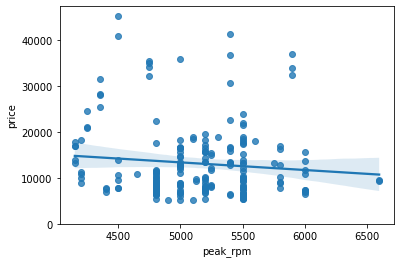

In [74]:
#Ejemplo de una correlación débil
df['peak_rpm'] = pd.to_numeric(df['peak_rpm'])
media = np.mean(df.peak_rpm)
df['peak_rpm'] = df['peak_rpm'].replace(np.nan, media)
sns.regplot(x='peak_rpm', y='price', data=df)
plt.ylim(0)

Correlation - Statistics
___

Una manera de medir la intensidad de la correlación entre variables numéricas continuas, es utilizando el método llamado correlación de Pearson.
El método de correlación de Pearson arrojará dos valores, el coeficiente de correlación y el p-value.
Un valor cercano a 1 indica una correlación positiva grande, mientras que un valor cercano a -1 implica una correlación negativa grande. Un valor cercano a 0 implica que no hay correlación entre las variables.
El p-value indica que tanta certera tenemos acerca del valor de correlación calculado. Para el p-value, un valor menor a 0.001 proporciona una gran certeza sobre el coeficiente de correlación calculado, un valor entre 0.001 y 0.05 proporciona una certeza moderada y un valor entre 0.05 y 0.1 informa de una certeza baja sobre el coeficiente de correlación calculado. Un p-value mayor a 0.1 no nos dará certeza de la correlación en absoluto.  
Una correlación fuerte indica un coeficiente de correlación cercano a 1 o -1 y un p-value menor que 0.001.

In [75]:
#Con el paquete stats de la librería Scipy se puede calcular el coeficiente de correlación de pearson.
df['horsepower'] = pd.to_numeric(df['horsepower'])
media = np.mean(df.horsepower)
df['horsepower'] = df['horsepower'].replace(np.nan, media)
pearson_coef, p_value = stats.pearsonr(df['horsepower'], df['price'])

In [76]:
pearson_coef, p_value

(0.7579169537498178, 1.6076703978129875e-39)

In [77]:
df.corr()

,symboling,wheel_base,length,width,height,curb_weight,engine_size,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
symboling,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.178515,0.071389,0.273679,-0.035823,0.034606,-0.082201
wheel_base,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.249786,0.351957,-0.360704,-0.470414,-0.544082,0.583168
length,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.158414,0.554434,-0.287031,-0.670909,-0.704662,0.682986
width,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.181129,0.642195,-0.219859,-0.642704,-0.677218,0.728699
height,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.261214,-0.110137,-0.320602,-0.048640,-0.107358,0.134388
curb_weight,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.151362,0.750968,-0.266283,-0.757414,-0.797465,0.820825
engine_size,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.028971,0.810713,-0.244599,-0.653658,-0.677470,0.861752
compression_ratio,-0.178515,0.249786,0.158414,0.181129,0.261214,0.151362,0.028971,1.000000,-0.205740,-0.435936,0.324701,0.265201,0.070990
horsepower,0.071389,0.351957,0.554434,0.642195,-0.110137,0.750968,0.810713,-0.205740,1.000000,0.130971,-0.803162,-0.770903,0.757917
peak_rpm,0.273679,-0.360704,-0.287031,-0.219859,-0.320602,-0.266283,-0.244599,-0.435936,0.130971,1.000000,-0.113723,-0.054257,-0.100854


Evidencia de progreso del curso.

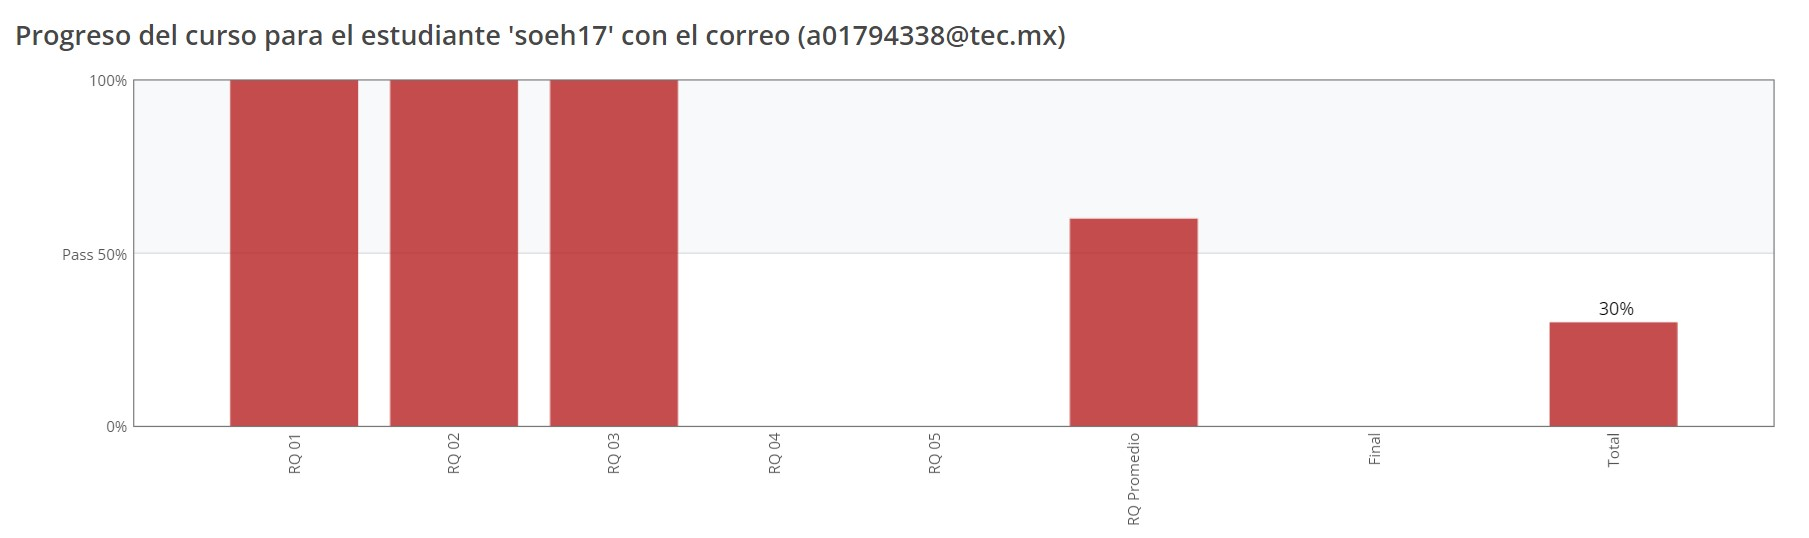